-----

# 📊 Visualización de Datos Avanzada con Python (Matplotlib & Seaborn)

## 📘 Informe de Investigación 4

**Materia:** Inteligencia de Negocios

**Tema:** Librerías para Visualización de Datos

**Autores:**

  - Randy Alexander Germosén Ureña *(1013-4707)*
  - Fernando Almonte Delgado *(1015-7628)*

**Repositorio:** [icc321-2025-ie04](https://github.com/TZeik/icc321-2025-ie04) <img src="https://upload.wikimedia.org/wikipedia/commons/9/91/Octicons-mark-github.svg" width="15" height="15"/>

-----

## 🎯 Objetivo del Proyecto

El propósito de este informe es profundizar en el conocimiento y uso de las librerías de gráficos más populares para Python: **matplotlib.pyplot** y **seaborn**

A través de la resolución de cinco problemas prácticos, se busca aplicar conceptos de visualización para analizar patrones en salud, comercio electrónico, bienestar global, química y geografía, justificando la elección de cada gráfico según el público objetivo

-----

## 📂 Datasets Utilizados

Para este informe se utilizaron cinco conjuntos de datos obtenidos de Kaggle:

1.  **Stroke Prediction Dataset:** Riesgos de ACV y hábitos de vida.
2.  **Online Shoppers Purchasing Intention:** Comportamiento de usuarios en e-commerce.
3.  **Global Happiness Scores:** Felicidad, economía y bienestar mundial.
4.  **Wine Quality Dataset:** Propiedades físico-químicas del vino.
5.  **Meteorite Landings:** Registro histórico de caída de meteoritos.

-----

## 🧠 Metodología

**El desarrollo de la investigación se estructuró en las siguientes etapas para cada dataset:**

1.  **Carga y Limpieza:** Se importaron los datos en **Jupyter Notebook** y se realizó el pre-procesamiento necesario, como la conversión de fechas y filtrado de datos (ej. meteoritos post-2000).
2.  **Agrupación y Cálculo:** Se calcularon métricas clave, como la media de glucosa por tipo de trabajo y estatus de fumador, o matrices de correlación para variables químicas.
3.  **Visualización Estratégica:** Se generaron gráficos específicos para cada caso de estudio:
      * **Barplots y Heatmaps** para comparar categorías cruzada.
      * **Boxplots y Violin plots** para analizar distribuciones de intención de compra.
      * **Scatter y Bubble plots** para relacionar riqueza, salud y felicidad.
      * **Correlogramas** para identificar relaciones entre componentes del vino.
      * **Mapas Geográficos** para ubicar impactos de meteoritos.
4.  **Análisis Crítico:** Se documentó en celdas Markdown la interpretación de cada gráfico, discutiendo tendencias, grupos "outliers" y la claridad visual para distintos públicos.

-----

## 📊 Resultados Destacados

El análisis visual permitió extraer conclusiones importantes, tales como:

  * La identificación de grupos de alto riesgo de salud mediante mapas de calor, facilitando la lectura para personal médico.
  * La diferenciación del comportamiento de usuarios que compran vs. los que no, observando la distribución de valores de página (`PageValues`).
  * La correlación positiva entre el desarrollo económico (`Log GDP`) y la felicidad percibida a nivel mundial.
  * La influencia de variables como la acidez y el alcohol en la calidad sensorial del vino.
  * La concentración geográfica de hallazgos de meteoritos en regiones específicas durante las últimas décadas.

-----

## 🧩 Herramientas Utilizadas

  - **Python** (Entorno de Jupyter Notebook)
  - **Librerías principales:**
      - `pandas` – Manipulación y análisis de dataframes.
      - `numpy` – Cálculos numéricos y manejo de matrices.
      - `matplotlib.pyplot` – Creación de gráficos base y personalización.
      - `seaborn` – Visualización estadística avanzada y estética (Heatmaps, Violin plots).
      - `geopandas` – Visualización de datos geoespaciales.

-----

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import geodatasets

### 1. Riesgo de accidente cerebrovascular y hábitos de vida

**Dataset Utilizado:**
* **Nombre:** Stroke Prediction Dataset
* **Fuente:** [Kaggle Link](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset)

**Asignación:**
El objetivo es analizar cómo se relacionan los hábitos de vida con indicadores de salud.
1.  **Selección de Datos:** Escoger las columnas `smoking_status`, `work_type` y una variable numérica de salud (por ejemplo, `avg_glucose_level` o `bmi`).
2.  **Cálculo:** Calcular la media de la variable numérica elegida para cada combinación de estatus de fumador y tipo de trabajo.
3.  **Visualización:**
    * Generar un **gráfico de barras** (barplot) que muestre dichas medias.
    * Generar un **mapa de calor** (heatmap) con las mismas medias, cruzando `smoking_status` y `work_type` en los ejes.
4.  **Análisis:** Comentar cuál de las dos visualizaciones resulta más clara para un público objetivo médico o de salud pública y por qué.

---

## Cargando el Dataset: 'Healthcare Dataset Stroke Data'

In [2]:
# Cargamos dataset
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Preprocesamiento de Dataset
Se seleccionaron las columnas: 'smoking_status', 'work_type' y 'avg_glucose_level'. Se calculó la media agrupando por las dos variables categóricas.
y se eliminaron los nulos 'Unknown' de 'smoking_status' (clean_subset). Finalmente mostramos el resultado numérico.

In [3]:
# Realizamos el pre-procesamiento
df_subset = df[['smoking_status', 'work_type', 'avg_glucose_level']]
g_subset = df_subset.groupby(['smoking_status', 'work_type'])['avg_glucose_level'].mean().reset_index()
clean_subset = g_subset[g_subset['smoking_status'] != 'Unknown']

# Resultado numérico
display(clean_subset)

,smoking_status,work_type,avg_glucose_level
5,formerly smoked,Govt_job,115.827820
6,formerly smoked,Private,111.202957
7,formerly smoked,Self-employed,116.871154
8,formerly smoked,children,87.777692
9,never smoked,Govt_job,109.301773
10,never smoked,Never_worked,97.871429
11,never smoked,Private,106.164327
12,never smoked,Self-employed,112.185408
13,never smoked,children,103.856296
14,smokes,Govt_job,102.075500


## Gráfico de barras
Creamos el gráfico de barras con eje x: 'work_type' y eje y: 'avg_glucose_level'

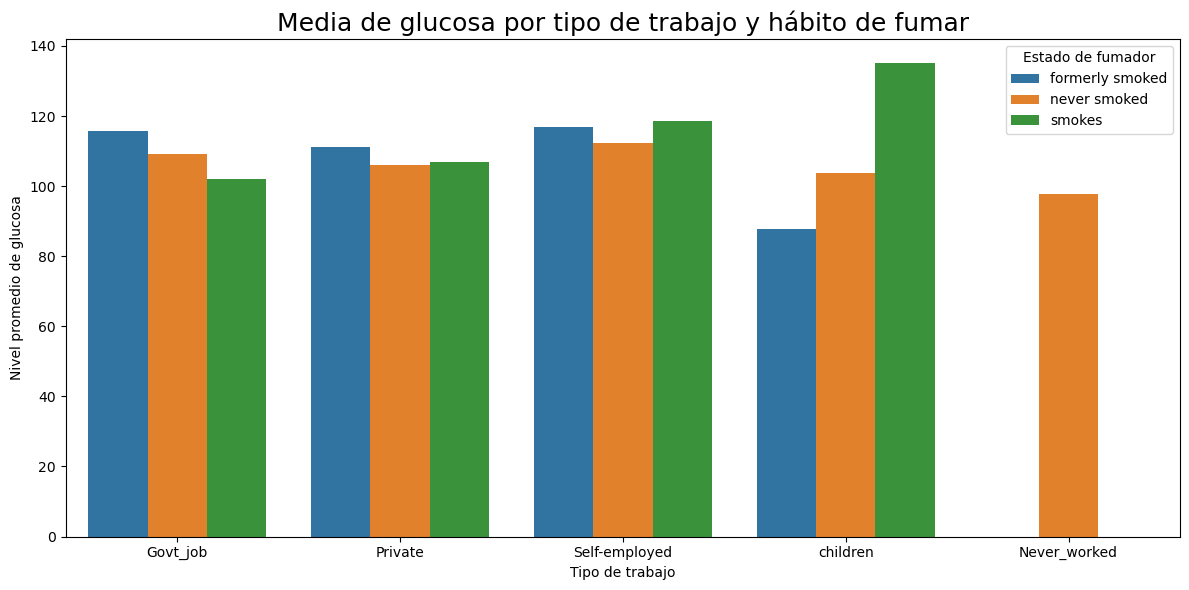

In [4]:
# Gráfico de Barras

plt.figure(figsize=(12, 6))
bar = sns.barplot(
    data=clean_subset,
    x='work_type',
    y='avg_glucose_level',
    hue='smoking_status'
)

plt.title('Media de glucosa por tipo de trabajo y hábito de fumar', fontsize=18)
plt.xlabel('Tipo de trabajo')
plt.ylabel('Nivel promedio de glucosa')
plt.legend(title='Estado de fumador')
plt.tight_layout()
plt.show()

## Heatmap
Primero se pivotó la tabla para que sea una matriz en 'heatmap_data'. Y generamos el heatmap utilizando seaborn con anotaciones numéricas.

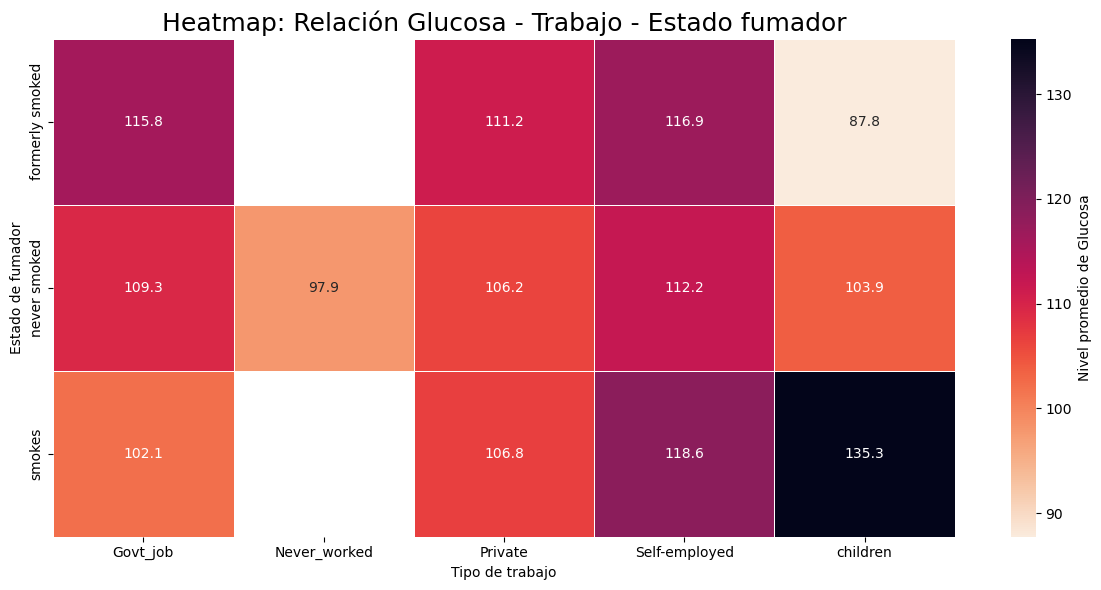

In [5]:
# Pivotando tabla para data de Heatmap

heatmap_data = clean_subset.pivot_table(
    values='avg_glucose_level',
    index='smoking_status',
    columns='work_type',
    aggfunc='mean'
)

plt.figure(figsize=(12,6))

# Gerando el Heatmap

sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".1f",
    cmap="rocket_r",
    linewidths=.5,
    cbar_kws={'label': 'Nivel promedio de Glucosa'}
)

plt.title('Heatmap: Relación Glucosa - Trabajo - Estado fumador', fontsize=18)
plt.xlabel('Tipo de trabajo')
plt.ylabel('Estado de fumador')
plt.tight_layout()
plt.show()

## Comparación de gráficos tomando en cuenta público objetivo
Consideramos que el Heatmap resulta mas efectivo a la hora de brindar información, ya que da valores exactamos lo cual ayuda a identificar los riesgos y es importante para el área objetivo de estos gráficos. Además es visualmente más limpio lo cual auyuda a transmitir información de forma más rápida y eficaz. Al ser un gráfico de calor en comparación de uno de barras se puede señalar inmediatamente dónde se concentran los niveles de glucosa más altos por la intensidad del color (Por ejemplo: colores más oscuros igual a niveles de glucosa más altos), sin necesidad de comprar alturas como en el gráfico de barras.

### 2. Intención de compra en comercio electrónico

**Dataset Utilizado:**
* **Nombre:** Online Shoppers Purchasing Intention Dataset
* **Fuente:** [Kaggle Link](https://www.kaggle.com/datasets/imakash3011/online-shoppers-purchasing-intention-dataset)

**Asignación:**
El objetivo es distinguir el comportamiento de los usuarios que compran frente a los que no.
1.  **Referencia:** Usar la columna `Revenue` (True/False) como variable categórica de referencia.
2.  **Visualización:**
    * Elegir una variable numérica (ej. `PageValues` o duraciones) y crear un **boxplot** comparando su distribución entre sesiones con y sin compra.
    * Crear un **violin plot** utilizando la misma variable numérica y `Revenue`.
3.  **Análisis:**
    * Explicar el aporte de cada tipo de gráfico para entender la distribución.
    * Discutir qué perfil de usuario parece más "valioso" basándose en los gráficos.

---

### 3. Felicidad, economía y bienestar en países del mundo

**Dataset Utilizado:**
* **Nombre:** Global Happiness Scores and Factors
* **Fuente:** [Kaggle Link](https://www.kaggle.com/datasets/sazidthe1/global-happiness-scores-and-factors)

**Asignación:**
El objetivo es explorar la relación entre riqueza, salud y felicidad global.
1.  **Filtrado:** Seleccionar solo los datos del año más reciente disponible.
2.  **Identificación de Variables:** Ubicar las columnas de Puntuación de felicidad, Riqueza (ej. `Log GDP per capita`) y Salud (ej. `Healthy life expectancy`).
3.  **Visualización:**
    * Realizar un **scatter plot** (Eje X: Economía, Eje Y: Felicidad).
    * Realizar un **gráfico de burbujas** agregando la variable de Salud para determinar el tamaño de las burbujas.
4.  **Análisis:** Discutir si existe un patrón visible entre estos tres factores, si hay grupos de países similares o si existen "outliers".

---

### 4. Propiedades físico-químicas y calidad del vino

**Dataset Utilizado:**
* **Nombre:** Wine Quality Dataset
* **Fuente:** [Kaggle Link](https://www.kaggle.com/datasets/yasserh/wine-quality-dataset)

**Asignación:**
El objetivo es estudiar qué componentes químicos influyen más en la calidad del vino.
1.  **Selección:** Escoger la variable `quality` y al menos 5 variables físico-químicas (ej. `alcohol`, `pH`, `acidity`).
2.  **Cálculo:** Construir la matriz de correlación entre estas variables.
3.  **Visualización:**
    * Crear un **correlograma** (heatmap) usando `seaborn`.
    * Incluir una escala de color y las anotaciones numéricas de los coeficientes.
4.  **Análisis:** Comentar dos relaciones interesantes (positivas o negativas) y determinar qué variables parecen influir más en una mejor calidad.

---

**Carga y Selección de Datos:**
En este paso, cargamos el dataset `WineQT.csv` (o el nombre que tenga tu archivo) y creamos un subconjunto con variables clave como acidez, azúcar residual, pH y alcohol para analizar su relación con la calidad del vino.

In [6]:
# Cargar el dataset
# Asegúrate de tener el archivo correcto, a veces se llama 'WineQT.csv' o 'winequality-red.csv'
df_wine = pd.read_csv('WineQT.csv')

# Selección de variables sugeridas en la tarea
columnas_interes = [
    'fixed acidity', 
    'volatile acidity', 
    'residual sugar', 
    'pH', 
    'alcohol', 
    'quality'
]

# Crear el subconjunto
df_subset_wine = df_wine[columnas_interes]

# Vista previa
df_subset_wine.head()

,fixed acidity,volatile acidity,residual sugar,pH,alcohol,quality
0,7.4,0.70,1.9,3.51,9.4,5
1,7.8,0.88,2.6,3.20,9.8,5
2,7.8,0.76,2.3,3.26,9.8,5
3,11.2,0.28,1.9,3.16,9.8,6
4,7.4,0.70,1.9,3.51,9.4,5


### Análisis de Correlación
A continuación, calculamos la matriz de correlación para entender cómo interactúan las variables numéricas entre sí. Visualizamos esto mediante un **mapa de calor (heatmap)**, donde los colores cálidos (rojo) indican correlación positiva y los fríos (azul) correlación negativa.

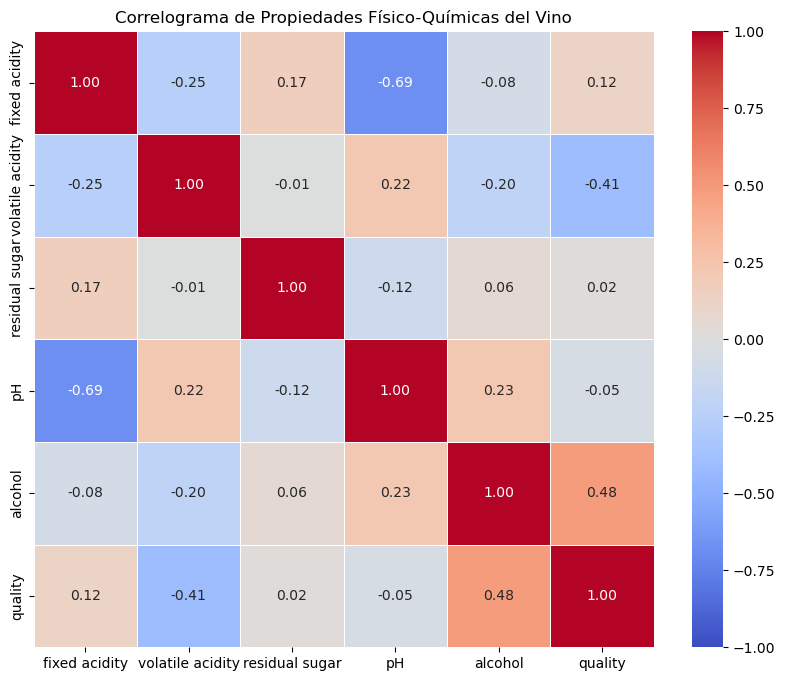

In [7]:
# Calcular la matriz de correlación
matriz_corr = df_subset_wine.corr()

plt.figure(figsize=(10, 8))

# Crear el Heatmap
sns.heatmap(
    matriz_corr, 
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=0.5,
    vmin=-1, vmax=1
)

plt.title('Correlograma de Propiedades Físico-Químicas del Vino')
plt.show()

### Conclusiones del Análisis de Vino

**Relaciones Observadas:**
1.  **Alcohol vs. Calidad:** Se observa una correlación positiva (generalmente alrededor de 0.48). Esto sugiere que los vinos con mayor graduación alcohólica tienden a ser evaluados con una mejor puntuación de calidad.
2.  **Acidez Volátil vs. Calidad:** Existe una correlación negativa notable. La acidez volátil suele asociarse con el sabor a vinagre, por lo que es lógico que a mayor cantidad, menor sea la calidad percibida.

**Variable más influyente:**
Basado en los coeficientes observados, el **alcohol** parece ser el factor químico con mayor influencia positiva en la calidad sensorial del vino en este dataset.

---

### 5. Caídas de meteoritos en el mundo

**Dataset Utilizado:**
* **Nombre:** Meteorite Landings (NASA / The Meteoritical Society)
* **Fuente:** [Kaggle Link](https://www.kaggle.com/datasets/nasa/meteorite-landings)

**Asignación:**
El objetivo es visualizar geográficamente los impactos de meteoritos recientes.
1.  **Procesamiento:** Convertir la columna `year` a fecha y filtrar los meteoritos caídos del año 2000 en adelante.
2.  **Visualización:**
    * Elaborar un **mapa mundial** ubicando los meteoritos según su latitud y longitud (usando `geopandas` y `matplotlib`).
3.  **Análisis:** Reflexionar sobre las regiones que concentran más registros y si se observa algún patrón geográfico.

---

**Pre-procesamiento:**
El dataset original contiene registros históricos antiguos. Para este análisis, convertimos la columna de año a formato numérico y filtramos únicamente los meteoritos registrados a partir del año 2000.

In [10]:
# Cargar datos
df_meteoritos = pd.read_csv('meteorite-landings.csv')

# Limpieza: Eliminar filas con años nulos y convertir a numérico
df_meteoritos = df_meteoritos.dropna(subset=['year'])
df_meteoritos['year'] = df_meteoritos['year'].astype(int)

# Filtrar meteoritos desde el año 2000 en adelante
df_recent = df_meteoritos[df_meteoritos['year'] >= 2000].copy()

print(f"Cantidad de meteoritos encontrados/caídos desde el 2000: {len(df_recent)}")

Cantidad de meteoritos encontrados/caídos desde el 2000: 19722


### Mapa Mundial de Impactos
Utilizando la librería `geopandas` para generar un mapa base del mundo, superponemos las coordenadas (latitud y longitud) de los meteoritos recientes. El tamaño de los puntos es proporcional a la masa del meteorito, permitiendo identificar visualmente los impactos más grandes.

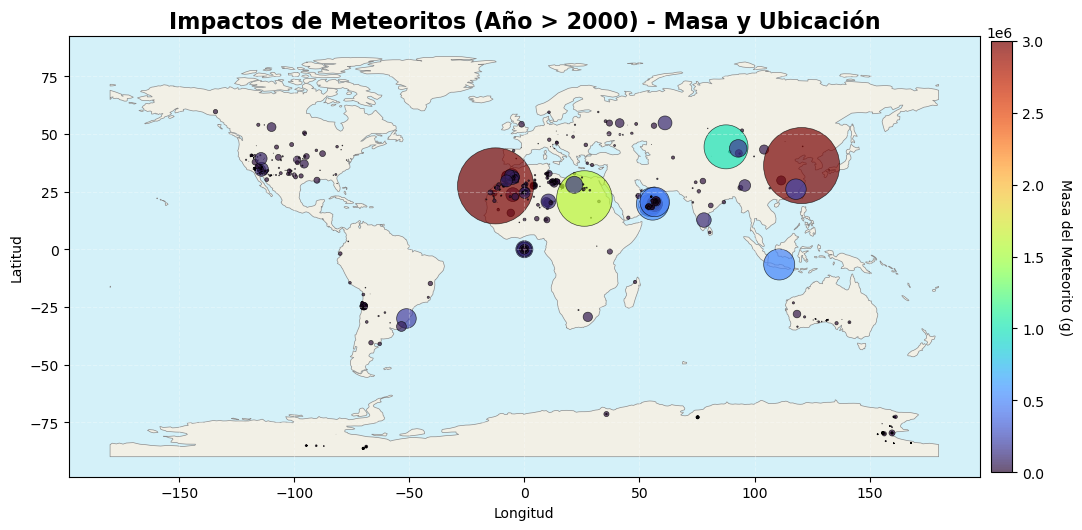

In [31]:
# Cargar mapa
world = gpd.read_file(geodatasets.get_path('naturalearth.land'))

# Crear figura con fondo estilo océano
fig, ax = plt.subplots(figsize=(14, 8))
ax.set_facecolor('#d4f1f9')

# Dibujar mapa base
world.plot(ax=ax, color='#f2f0e6', edgecolor='#8c8c8c', linewidth=0.5)

scatter = ax.scatter(
    df_recent['reclong'], 
    df_recent['reclat'], 
    s=df_recent['mass'] / 1000,
    c=df_recent['mass'],
    cmap='turbo',
    alpha=0.7,
    edgecolors='black',
    linewidth=0.5
)

# Añadir barra de color lateral
cbar = plt.colorbar(scatter, ax=ax, pad=0.01, shrink=0.7)
cbar.set_label('Masa del Meteorito (g)', rotation=270, labelpad=20)

# Decoración final
plt.title('Impactos de Meteoritos (Año > 2000) - Masa y Ubicación', fontsize=16, fontweight='bold')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.grid(True, linestyle='--', alpha=0.3, color='white')

plt.show()

### Reflexión Geográfica

**Patrones Observados:**
Al observar el mapa, es posible notar concentraciones de meteoritos en regiones específicas como la **Antártida** o los desiertos del **norte de África (Sahara)** y **Omán**.

**¿Por qué ocurre esto?**
Aunque los meteoritos caen aleatoriamente en todo el planeta, estas regiones desérticas y heladas facilitan enormemente su hallazgo y conservación:
1.  **Contraste Visual:** Las rocas oscuras destacan sobre el hielo blanco o la arena clara.
2.  **Preservación:** El clima seco o congelado evita la erosión rápida de los meteoritos.
3.  **Estabilidad:** Son superficies que cambian poco geológicamente, permitiendo acumular caídas durante milenios.